In [1]:
# Preprocessing libraries

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Importing Classifiers

from PEA import PerformanceEnrichmentAnalysisClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import helper_data_generator
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings('always')

In [2]:
df = pd.read_csv('../../data/pea_data_2018-08-28_cleaned.csv', sep=';', decimal=',')

X_full = df.loc[:, ['order_weight_aim',
                'width',
                'thickness',
                'piece_weight_aim',
                "productionsteps"]].reset_index(drop=True)
y_full = df.loc[:,'lateness']

borders = [-2880, 2880]

(y_full_encoded_values, Y_full_encoded_class_labels) =  helper_data_generator.encode_target_features_to_categorical(y_full, borders)

In [ ]:
sc = StandardScaler()
X_full = sc.fit_transform(X_full)
tsne = TSNE(n_components=2, perplexity=10)
tsne_obj= tsne.fit_transform(X_full)

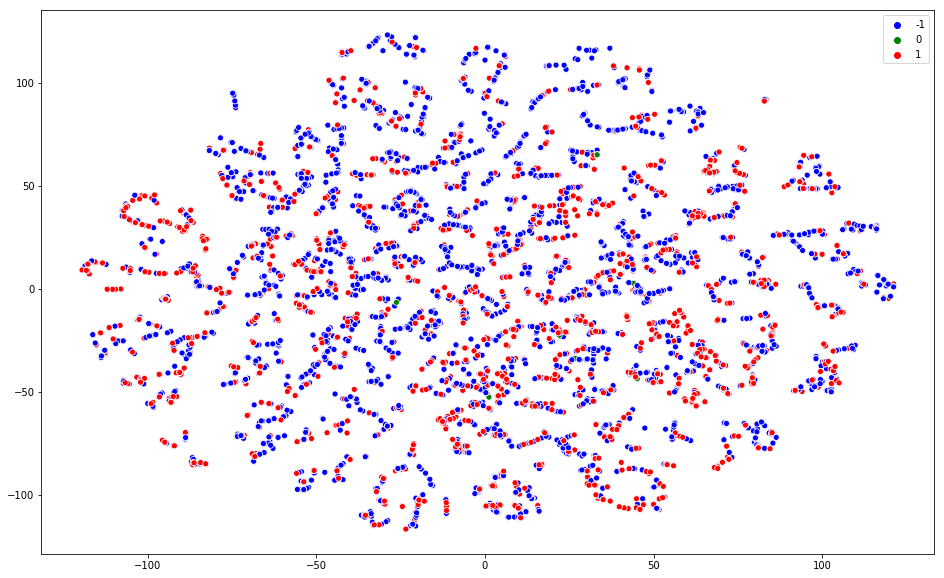

In [42]:
plt.figure(figsize=(16,10))
sns.scatterplot(x= tsne_obj[:,0], y= tsne_obj[:,1], hue=np.array(y_full_encoded_values), palette=['b','g','r']);

In [39]:
# Proportion of labels

print('label -1: ',np.mean(y_full_encoded_values==-1))
print('label 0: ',np.mean(y_full_encoded_values==0))
print('label 1: ',np.mean(y_full_encoded_values==1))

label -1:  0.6501412792191112
label 0:  0.002440277421012073
label 1:  0.3474184433598767


- #### F1 score is usually not being used here for multiclass labels because it is biased towards lower                    precision/recall
- #### sklearn.make_classification
    - Used t-SNE to visualize the labels in 2D and found that they are a subject to **num_of_cluster_per_label** > 10
    - Few observed values from PEA dataset, ignoring the individual distributions of each separate features
        - number_of_samples = 1000
        - number_of_features = 26
        - number_informative_features = 5
        - number_redundant_features = 21
        - number_repeated_features = 0
        - number_classes = 3
        - weights = [0.64, 0.34, 0.02] - **mimicking the imbalanced proportion in PEA dataset**
        
- #### Priority
    - Auc roc > accuracy> matthews_corrcoef > cohen kappa score for multiclass and imbalanced class
- #### type_param 
    - noise
    - class_sep
    - cluster_per_class
        - n_classes * n_clusters_per_class must be smaller or equal 2 ** n_informative
            - start, end, step = 1, 10, 1
        
- #### metric_classifier
    - accuracy
    - f1_score
    - precision
    - recall
    - roc_auc
    - cohen_kappa_score
        - Agreement between y_test and y_pred
        - Value < 0 is indicating no agreement , 0–0.20 as slight, 0.21–0.40 as fair, 0.41–0.60 as moderate, 0.610.80 as substantial, and 0.81–1 as almost perfect agreement.
    - matthews_corrcoef
        - A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.

### Choosing the classifiers

In [3]:
# Choose any list of classifiers

clf_list = [
     PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100),
     KNeighborsClassifier(3),
     # SVC(kernel="linear", C=0.025),
      SVC(gamma=2, C=1),
     DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     AdaBoostClassifier(),
     #GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]

### Observations with varying noise

In [6]:
metric_classifier = 'accuracy'
start, end, step = 0, 1, 0.01
type_param = 'noise'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

IndexError: index 5 is out of bounds for axis 0 with size 5

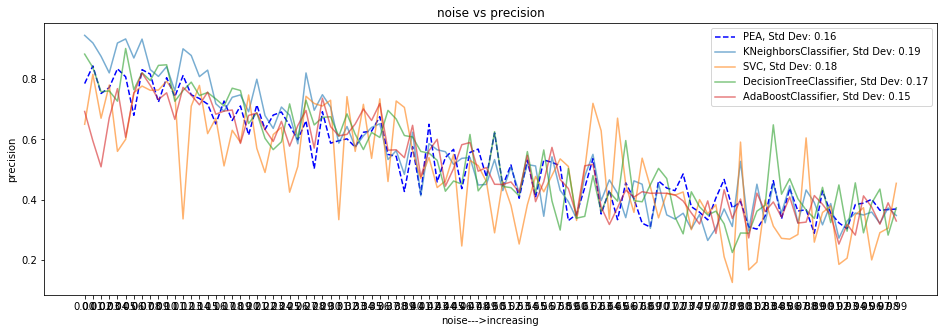

In [4]:
metric_classifier = 'precision'
start, end, step = 0, 1, 0.01
type_param = 'noise'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

In [7]:
metric_classifier = 'recall'
start, end, step = 0, 1, 0.1
type_param = 'noise'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

IndexError: index 5 is out of bounds for axis 0 with size 5

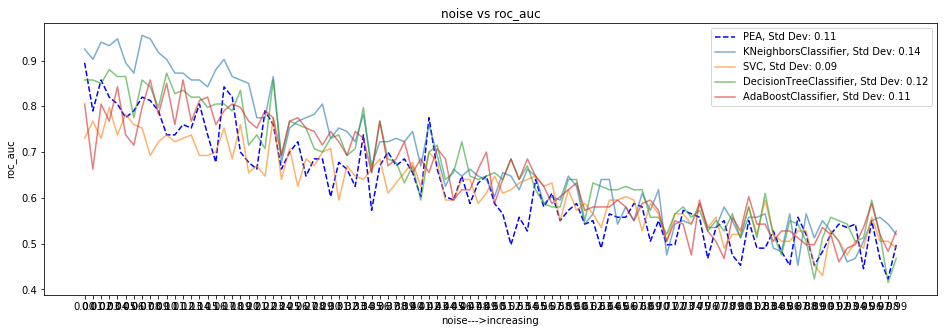

In [6]:
metric_classifier = 'roc_auc'
start, end, step = 0, 1, 0.01
type_param = 'noise'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

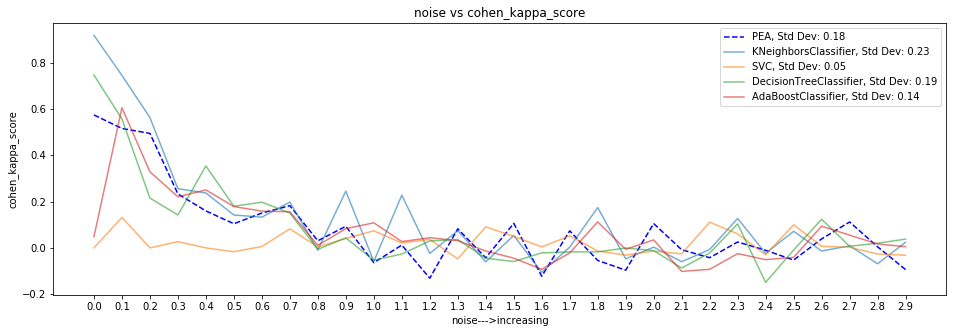

In [7]:
metric_classifier = 'cohen_kappa_score'
start, end, step = 0, 3, 0.1
type_param = 'noise'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

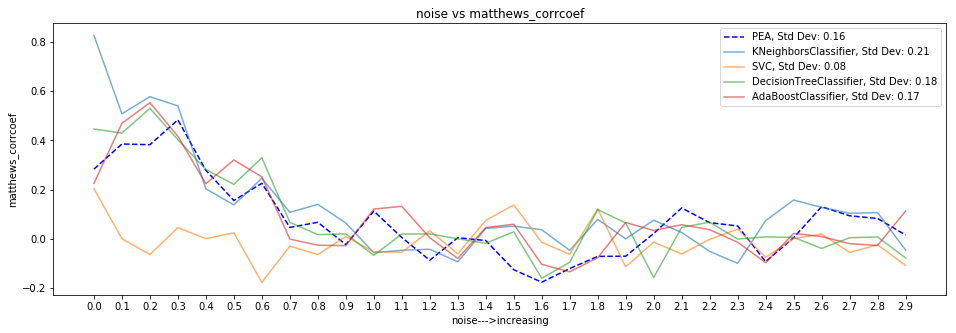

In [8]:
metric_classifier = 'matthews_corrcoef'
start, end, step = 0, 3, 0.1
type_param = 'noise'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

### Observations with varying complexity in the model

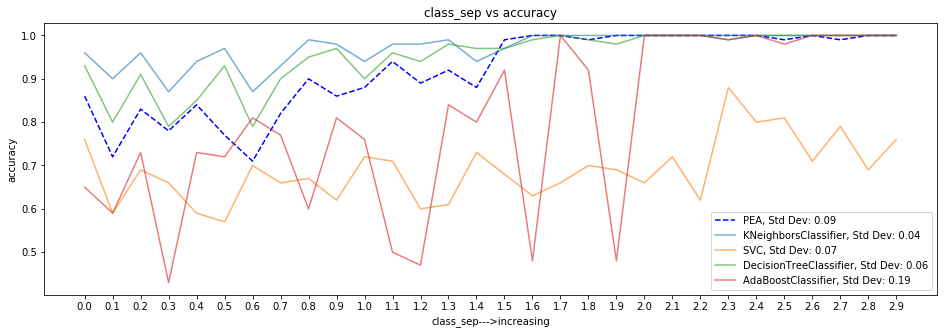

In [9]:
metric_classifier = 'accuracy'
start, end, step = 0, 3, 0.1
type_param = 'class_sep'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

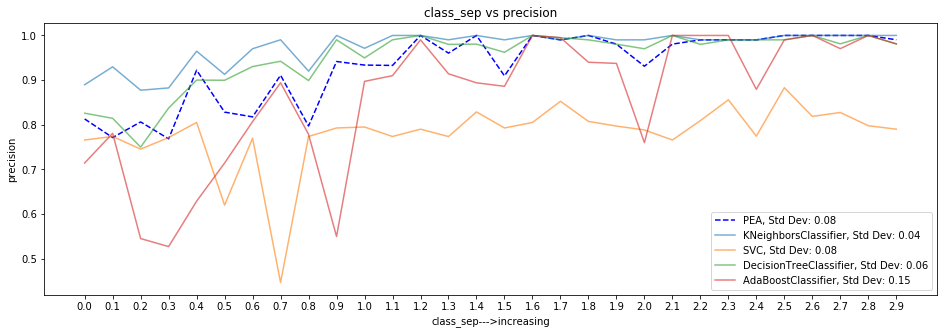

In [10]:
metric_classifier = 'precision'
start, end, step = 0, 3, 0.1
type_param = 'class_sep'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


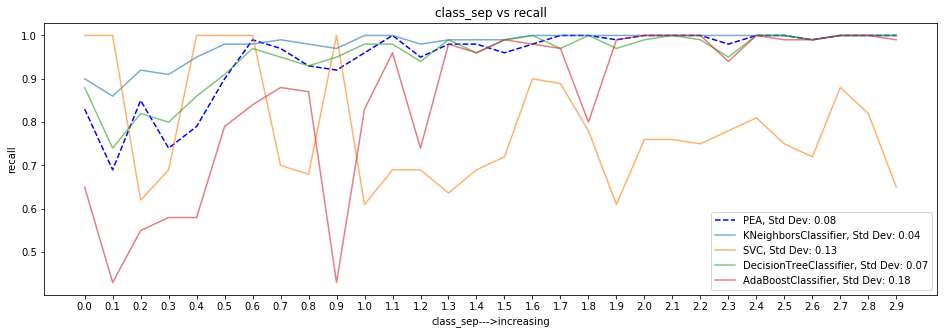

In [23]:
metric_classifier = 'recall'
start, end, step = 0, 3, 0.1
type_param = 'class_sep'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

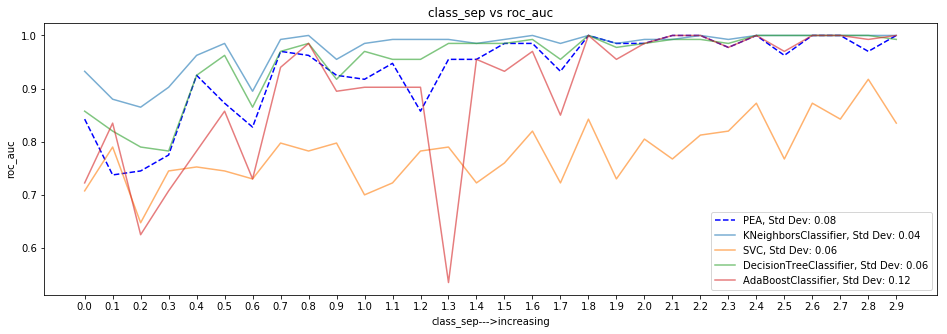

In [11]:
metric_classifier = 'roc_auc'
start, end, step = 0, 3, 0.1
type_param = 'class_sep'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

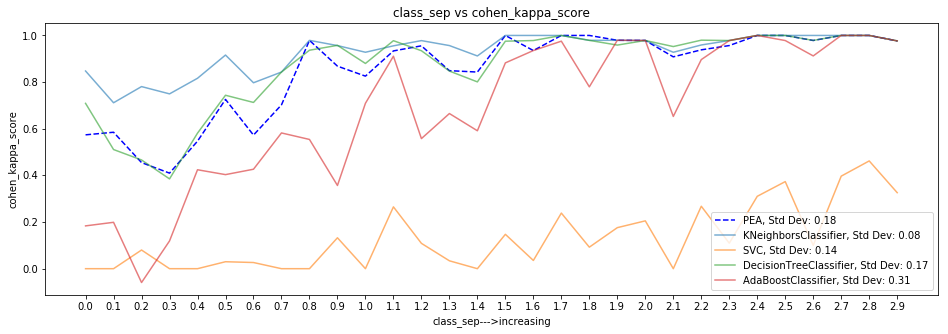

In [12]:
metric_classifier = 'cohen_kappa_score'
start, end, step = 0, 3, 0.1
type_param = 'class_sep'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

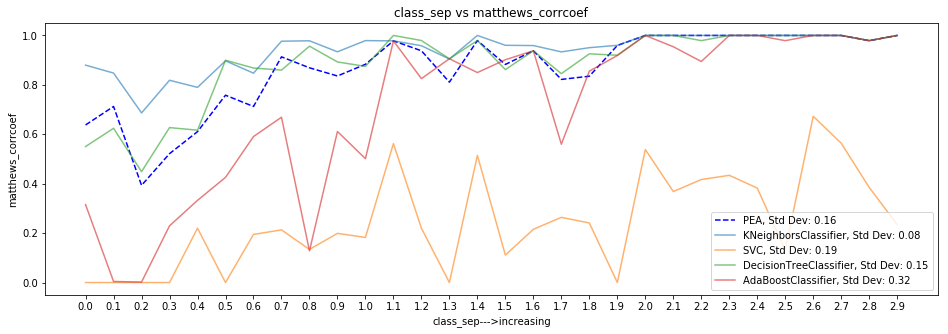

In [13]:
metric_classifier = 'matthews_corrcoef'
start, end, step = 0, 3, 0.1
type_param = 'class_sep'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

### Observations with varying number of clusters in each label

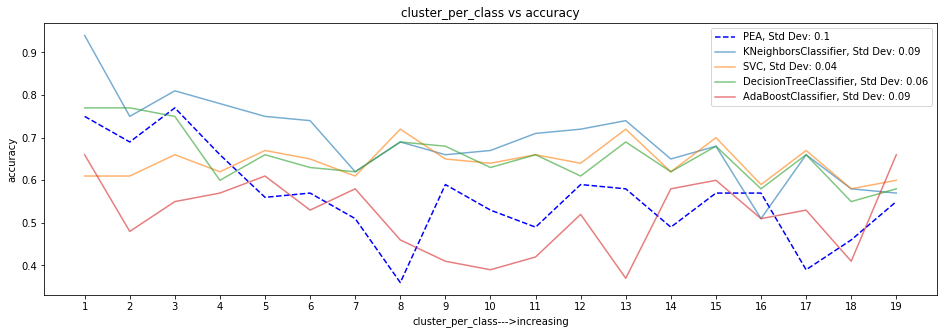

In [14]:
metric_classifier = 'accuracy'
start, end, step = 1, 20, 1
type_param = 'cluster_per_class'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

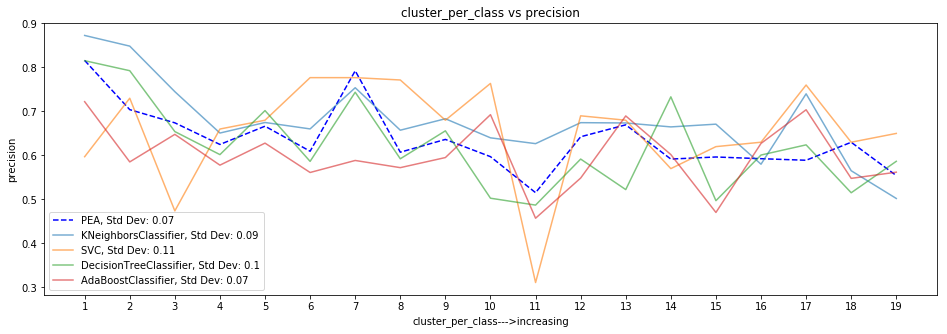

In [15]:
metric_classifier = 'precision'
start, end, step = 1, 20, 1
type_param = 'cluster_per_class'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


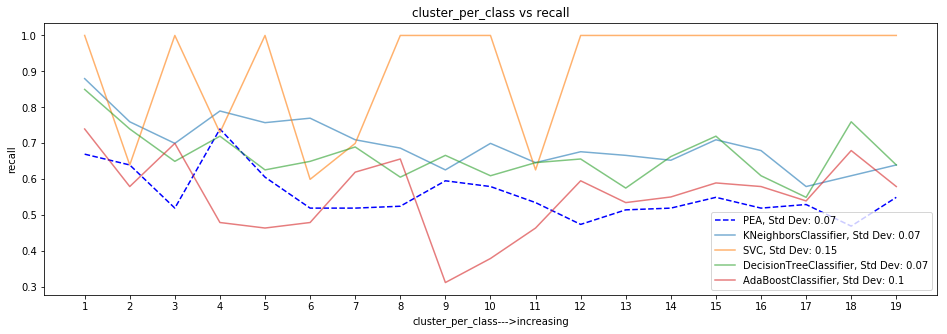

In [24]:
metric_classifier = 'recall'
start, end, step = 1, 20, 1
type_param = 'cluster_per_class'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

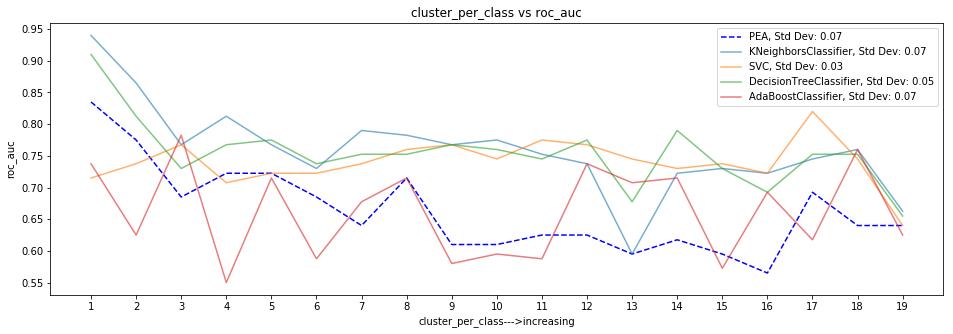

In [16]:
metric_classifier = 'roc_auc'
start, end, step = 1, 20, 1
type_param = 'cluster_per_class'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

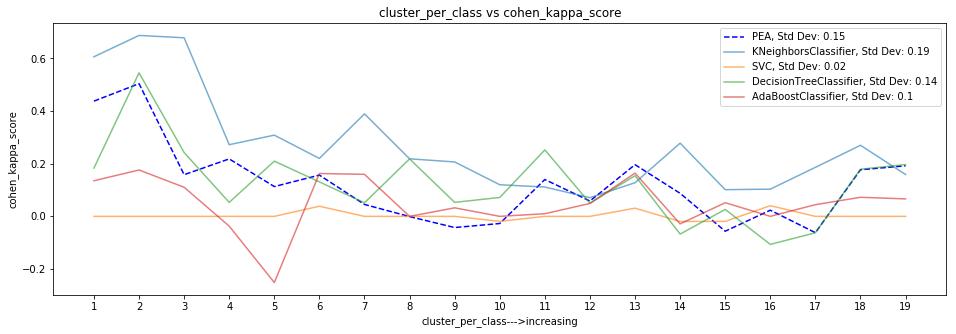

In [17]:
metric_classifier = 'cohen_kappa_score'
start, end, step = 1, 20, 1
type_param = 'cluster_per_class'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

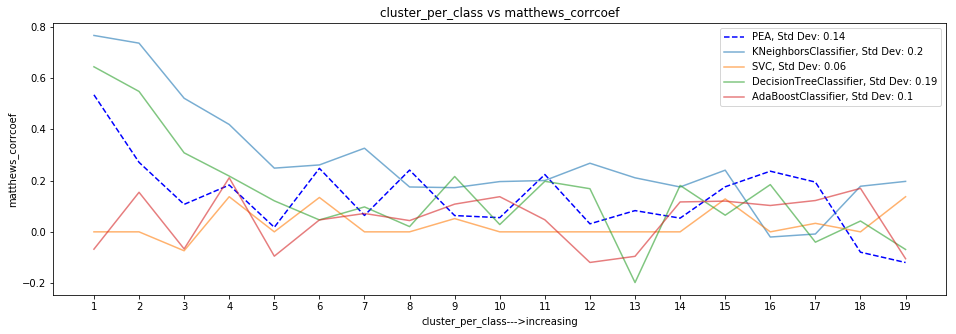

In [18]:
metric_classifier = 'matthews_corrcoef'
start, end, step = 1, 20, 1
type_param = 'cluster_per_class'
size = (16,5)

helper_data_generator.plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)